## Sect2. Linear Regression

Hypothesis and cost function
$$H(x) = Wx+b$$ $$cost(W,b) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

### TensorFlow Mechanics
1. Build graph using TF operations
2. Run graph and get results
3. Update graph and get results

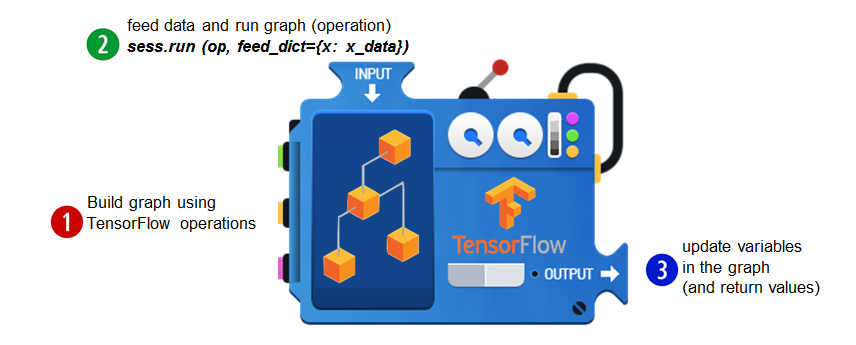

### Ex1. Variable 사용
$$H(x) = Wx+b$$

x, y 값이 주어졌을 때, W, b 값을 예측하기

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [54]:
from tqdm import tqdm_notebook # 진행 상태 표시
import tensorflow as tf

# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# TF 변수 선언 (1차원 정규분포 하나 생성)
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b

# cost/loss function
# tf.square = 제곱
# reduce_mean x = [[1, 1, 2, 2]]면 (1+1+2+2) / 4 = 1.5가 int로 나옴
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [55]:
sess.run(hypothesis - y_train)

array([-1.6007625, -3.3046193, -5.0084763], dtype=float32)

In [60]:
sess.run(tf.square(hypothesis - y_train))

array([ 2.5624406, 10.920508 , 25.084835 ], dtype=float32)

In [61]:
sess.run( tf.reduce_mean(tf.square(hypothesis - y_train)))

12.855927

In [62]:
250 % 200

50

In [69]:
# Fit the line
for step in tqdm_notebook(range(2001)):
    sess.run(train)
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val},  \t W={W_val},  \t b={b_val}".format(
            step=step, 
            cost_val=sess.run(cost), 
            W_val=sess.run(W), 
            b_val=sess.run(b)
        ));

step=0, 	 cost=10.17691421508789,  	 W=[-0.548954],  	 b=[0.16918679]
step=1, 	 cost=8.059224128723145,  	 W=[-0.41115242],  	 b=[0.22776121]
step=2, 	 cost=6.385232448577881,  	 W=[-0.2885553],  	 b=[0.2796521]
step=3, 	 cost=5.061959743499756,  	 W=[-0.1794762],  	 b=[0.32560125]
step=4, 	 cost=4.0159125328063965,  	 W=[-0.0824158],  	 b=[0.36626828]
step=200, 	 cost=0.027821531519293785,  	 W=[0.8062748],  	 b=[0.44038308]
step=400, 	 cost=0.010623614303767681,  	 W=[0.88028955],  	 b=[0.27212998]
step=600, 	 cost=0.004056618083268404,  	 W=[0.9260263],  	 b=[0.16815977]
step=800, 	 cost=0.0015490102814510465,  	 W=[0.9542888],  	 b=[0.10391241]
step=1000, 	 cost=0.0005914868670515716,  	 W=[0.9717533],  	 b=[0.06421152]
step=1200, 	 cost=0.00022585951955989003,  	 W=[0.9825452],  	 b=[0.03967889]
step=1400, 	 cost=8.624360634712502e-05,  	 W=[0.98921394],  	 b=[0.0245191]
step=1600, 	 cost=3.29316062561702e-05,  	 W=[0.99333495],  	 b=[0.01515119]
step=1800, 	 cost=1.25749857033952

### Ex2. Plaeholder 사용
데이터의 형태만 지정하고 실제 데이터는 실행단계에서 입력받는 방법

1. 그래프 빌드
2. 세션을 통해 그래프를 실행
3. 실행결과가 그래프를 업데이트

In [70]:
import tensorflow as tf

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
# sess.run(tf.initialize_all_variables())
sess.run(tf.global_variables_initializer())

In [71]:
# Fit the line # 너무 가독성이 없음
steps     = []
cost_vals = []
W_vals    = []
b_vals    = []
for step in tqdm_notebook(range(2001)):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                         feed_dict={X: [1, 2, 3], 
                                                    Y: [1, 2, 3]})
    steps.append(step)
    cost_vals.append(cost_val)
    W_vals.append(W_val)
    b_vals.append(b_val)
    # W_vals.append(float(W_val))
    # b_vals.append(float(b_val))
    
    if step % 200 == 0 or step < 5:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val}, \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=0.21300764381885529, 	 W=[0.4533088], 	 b=[1.0384691]
step=1, 	 cost=0.20226295292377472, 	 W=[0.46279454], 	 b=[1.0395674]
step=2, 	 cost=0.19360725581645966, 	 W=[0.47135103], 	 b=[1.0402642]
step=3, 	 cost=0.18660330772399902, 	 W=[0.47908103], 	 b=[1.040605]
step=4, 	 cost=0.18090589344501495, 	 W=[0.48607594], 	 b=[1.0406296]
step=200, 	 cost=0.06320635229349136, 	 W=[0.7087064], 	 b=[0.6621789]
step=400, 	 cost=0.024135252460837364, 	 W=[0.81999826], 	 b=[0.4091863]
step=600, 	 cost=0.009216022677719593, 	 W=[0.88876987], 	 b=[0.2528522]
step=800, 	 cost=0.0035191215574741364, 	 W=[0.93126655], 	 b=[0.15624733]
step=1000, 	 cost=0.0013437760062515736, 	 W=[0.9575269], 	 b=[0.09655123]
step=1200, 	 cost=0.0005131151410751045, 	 W=[0.9737543], 	 b=[0.05966274]
step=1400, 	 cost=0.00019593589240685105, 	 W=[0.98378164], 	 b=[0.03686807]
step=1600, 	 cost=7.481790817109868e-05, 	 W=[0.9899778], 	 b=[0.02278244]
step=1800, 	 cost=2.856933861039579e-05, 	 W=[0.993807], 	

In [6]:
W_val, W_val[0], type(W_val[0])

(array([1.0036768], dtype=float32), 1.0036768, numpy.float32)

In [7]:
# cost_vals, b_val
type(b_val), str(b_val), float(b_val)

(numpy.ndarray, '[-0.00835816]', -0.00835816003382206)

### Ex3. Placeholder 사용
exptected : W=1, b=1.1

- X: [1.0, 2.0, 3.0, 4.0, 5.0]
- Y: [2.1, 3.1, 4.1, 5.1, 6.1]

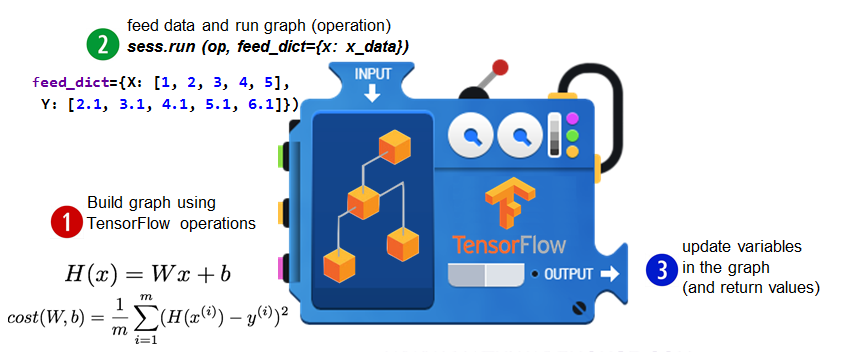

In [8]:
# Fit the line
# for step in notebook_tqdm(range(2001)):
for step in range(2001):

    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
        feed_dict={X: [1.0, 2.0, 3.0, 4.0, 5.0], 
                   Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 100 == 0 or step < 10:
        # print(step, cost_val, W_val, b_val)
        print("step={step}, \t cost={cost_val}, \t W={W_val},  \t b={b_val}".format(
            step=step, cost_val=cost_val, W_val=W_val, b_val=b_val
            ));

step=0, 	 cost=1.2041550874710083, 	 W=[1.0693693],  	 b=[0.01358839]
step=1, 	 cost=0.7810412645339966, 	 W=[1.1192927],  	 b=[0.03115446]
step=2, 	 cost=0.5339359045028687, 	 W=[1.157179],  	 b=[0.04537381]
step=3, 	 cost=0.3894032835960388, 	 W=[1.1858772],  	 b=[0.05703559]
step=4, 	 cost=0.3046484887599945, 	 W=[1.2075621],  	 b=[0.06674224]
step=5, 	 cost=0.2547328770160675, 	 W=[1.2238939],  	 b=[0.07495367]
step=6, 	 cost=0.2251235544681549, 	 W=[1.23614],  	 b=[0.08202096]
step=7, 	 cost=0.2073509246110916, 	 W=[1.245268],  	 b=[0.08821214]
step=8, 	 cost=0.19647976756095886, 	 W=[1.2520163],  	 b=[0.09373181]
step=9, 	 cost=0.1896340548992157, 	 W=[1.2569488],  	 b=[0.0987362]
step=100, 	 cost=0.09815245866775513, 	 W=[1.2027112],  	 b=[0.36814803]
step=200, 	 cost=0.04985827952623367, 	 W=[1.144476],  	 b=[0.5783956]
step=300, 	 cost=0.025326374918222427, 	 W=[1.1029707],  	 b=[0.72824305]
step=400, 	 cost=0.012864975258708, 	 W=[1.073389],  	 b=[0.8350418]
step=500, 	 cost=

### Ex4. Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

number_of_points = 200
x_point = []
y_point = []

w = 0.25
b = 0.75

for i in range(number_of_points):
    x = np.random.normal(0.0, 0.5)
    y = w*x + b +np.random.normal(0.0, 0.1)
    x_point.append([x])
    y_point.append([y])

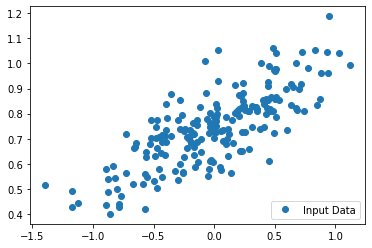

In [2]:
plt.plot(x_point,y_point, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [3]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
B = tf.Variable(tf.zeros([1]))
y = W * x_point + B

# Computes the mean of elements across dimensions of a tensor
cost_function = tf.reduce_mean(tf.square(y - y_point))

# Optimizer that implements the gradient descent algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

# Add operations to minimize cost_function
train = optimizer.minimize(cost_function)

# Returns an Op that initializes global variables
# model = tf.initialize_all_variables()
model = tf.global_variables_initializer()


 y = [0.6747309] x + [0.7485701] 


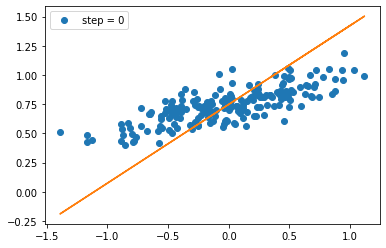


 y = [0.5736401] x + [0.7480626] 


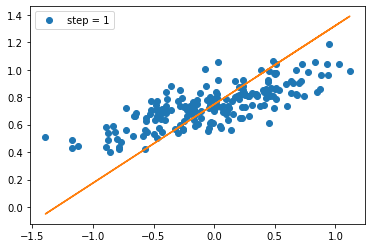


 y = [0.49604198] x + [0.7476836] 


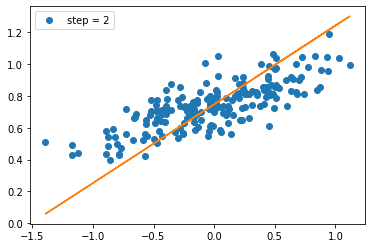


 y = [0.43647704] x + [0.7473926] 


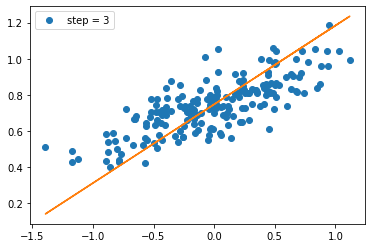


 y = [0.3907545] x + [0.7471693] 


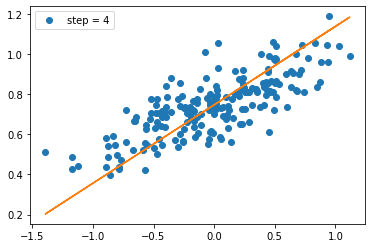


 y = [0.23972955] x + [0.74643165] 


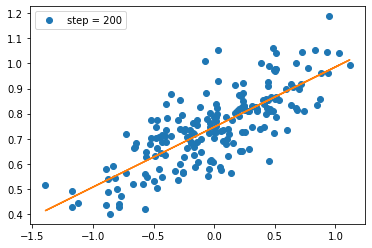


 y = [0.23972955] x + [0.74643165] 


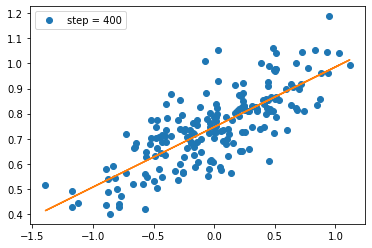


 y = [0.23972955] x + [0.74643165] 


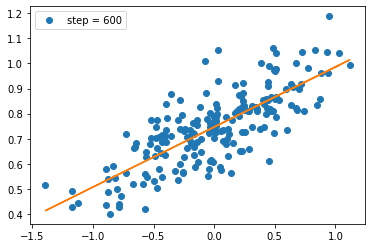


 y = [0.23972955] x + [0.74643165] 


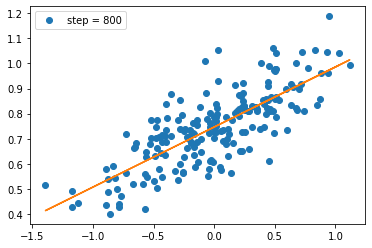


 y = [0.23972955] x + [0.74643165] 


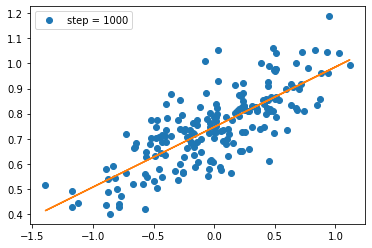


 y = [0.23972955] x + [0.74643165] 


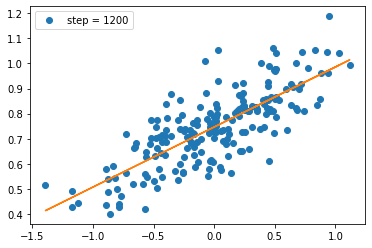


 y = [0.23972955] x + [0.74643165] 


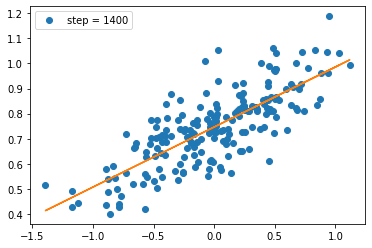


 y = [0.23972955] x + [0.74643165] 


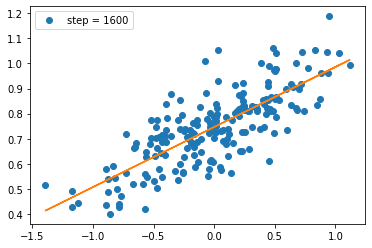


 y = [0.23972955] x + [0.74643165] 


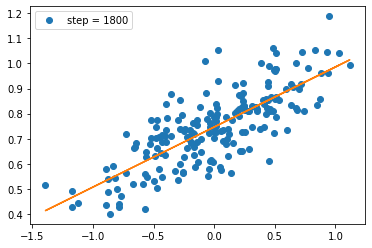


 y = [0.23972955] x + [0.74643165] 


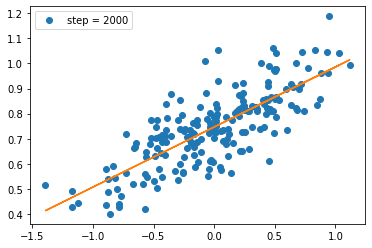

In [4]:
with tf.Session() as sess:
    sess.run(model)
    for step in range(0,2001):
        sess.run(train)
        if (step % 200) == 0 or step<5:
            print("\n y = {w} x + {b} ".format(w=sess.run(W), b=sess.run(B)))
            plt.plot(x_point,y_point,'o',label='step = {}'.format(step))
            plt.plot(x_point,sess.run(W)*x_point+sess.run(B))
            plt.legend(loc=2)
            plt.show()